In [78]:
import cv2
import matplotlib.pyplot as plt
import os
import numpy as np
from PIL import Image

In [79]:
img_path = 'D:/Dataset/dog_cat_pics'
img_file = 'IMG-20180930-WA0014.jpg'
LR = 1e-3
IMG_SIZE = 50

In [80]:
def process_test_image():
    img = img_file
    test_img_data = []
    path = os.path.join(img_path, img)
    img_num = img.split('.')[0]
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    
    test_img_data.append([np.array(img), img_num])
    
    np.save('test_img_data.npy', test_img_data)
    return test_img_data

In [81]:
img_data = process_test_image()

print(len(img_data))
print(img_data)

1
[[array([[157, 158, 159, ...,  52, 255, 255],
       [157, 157, 157, ...,  55, 149, 207],
       [157, 157, 162, ...,  91, 252, 255],
       ...,
       [ 48,  45,  48, ...,  87,  80,  53],
       [ 55,  60,  66, ..., 136, 116, 148],
       [ 61,  49,  58, ..., 181, 230, 226]], dtype=uint8), 'IMG-20180930-WA0014']]


In [82]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression

import tensorflow as tf
tf.reset_default_graph()

convnet = input_data(shape=[None, IMG_SIZE, IMG_SIZE, 1], name='input')

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 128, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 64, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = conv_2d(convnet, 32, 5, activation='relu')
convnet = max_pool_2d(convnet, 5)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.8)

convnet = fully_connected(convnet, 2, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

In [83]:
if os.path.exists('dogsvscats-0.001-6conv-basic.model.meta'):
    model.load('dogsvscats-0.001-6conv-basic.model')
    print('Model loaded!')

INFO:tensorflow:Restoring parameters from D:\Projects\CatsVDogs\dogsvscats-0.001-6conv-basic.model
Model loaded!


In [84]:
fig = plt.figure()

#cat: [1, 0]
#dog: [0,1]

<Figure size 432x288 with 0 Axes>

In [85]:
image_data = np.array(img_data[0])
print(image_data)

data_image = image_data[0]
print(data_image)

[array([[157, 158, 159, ...,  52, 255, 255],
       [157, 157, 157, ...,  55, 149, 207],
       [157, 157, 162, ...,  91, 252, 255],
       ...,
       [ 48,  45,  48, ...,  87,  80,  53],
       [ 55,  60,  66, ..., 136, 116, 148],
       [ 61,  49,  58, ..., 181, 230, 226]], dtype=uint8)
 'IMG-20180930-WA0014']
[[157 158 159 ...  52 255 255]
 [157 157 157 ...  55 149 207]
 [157 157 162 ...  91 252 255]
 ...
 [ 48  45  48 ...  87  80  53]
 [ 55  60  66 ... 136 116 148]
 [ 61  49  58 ... 181 230 226]]


[[157 158 159 ...  52 255 255]
 [157 157 157 ...  55 149 207]
 [157 157 162 ...  91 252 255]
 ...
 [ 48  45  48 ...  87  80  53]
 [ 55  60  66 ... 136 116 148]
 [ 61  49  58 ... 181 230 226]]
[0.45926037 0.54073966]


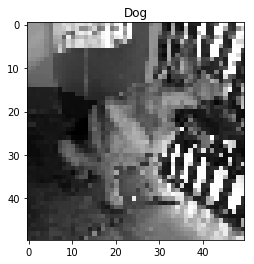

In [86]:
#image = Image.open('{}/{}'.format(img_path, img_file))
#y = fig
orig = data_image
print(orig)
data = data_image.reshape(IMG_SIZE, IMG_SIZE, 1)

model_out = model.predict([data])[0]

print(model_out)

if np.argmax(model_out) == 1:
    str_label = 'Dog'
else:
    str_label = 'Cat'

#y.imshow(orig, cmap='gray')
plt.imshow(orig, cmap='gray')
#image.show()
plt.title(str_label)
#y.axes.get_xaxis().set_visible(False)
#y.axes.get_yaxis().set_visible(False)

plt.show()